# Supply Chain Data Exploration
### Objective: Understand the structure, quality, and patterns in the dataset

In [67]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Configure default plot style
sns.set(style="whitegrid")

# Load the dirty dataset
df = pd.read_csv("C:/Users/User/OneDrive/DS/Projekte/SCM Analysis/data/supply_chain_data.csv")

In [ ]:
# First look at the data
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset shape:", df.shape)

# Findings:
# - Price Coloumns should only have 2 decimals
# - Defect rates should be in percentage


First 5 rows:
  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792                   NaN            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai     

In [ ]:
# Data types and non-null values
print("\nData types and null counts:")
print(df.info())

# Findings:
# - Missing Values in "Shipping costs" and "Customer demographics"
# - Line 8 and 15 are almost the same?


Data types and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             101 non-null    object 
 1   SKU                      101 non-null    object 
 2   Price                    101 non-null    float64
 3   Availability             101 non-null    int64  
 4   Number of products sold  101 non-null    int64  
 5   Revenue generated        101 non-null    float64
 6   Customer demographics    95 non-null     object 
 7   Stock levels             101 non-null    int64  
 8   Lead times               101 non-null    int64  
 9   Order quantities         101 non-null    int64  
 10  Shipping times           101 non-null    int64  
 11  Shipping carriers        101 non-null    object 
 12  Shipping costs           96 non-null     float64
 13  Supplier name            101 non-null    object 
 1

In [ ]:
# Descriptive statistics for numeric columns
print("\nDescriptive statistics:")
print(df.describe().T)

# Findings
# - Shipping times include negative values
# - Defect rates show a strong outlier at 100%
# - Some columns show overlapping meaning (`Lead time` vs `Lead times`)
# - Production and order quantities appear balanced, suggesting an efficient replenishment system.
# - Cost metrics show large variation



Descriptive statistics:
                         count         mean          std          min  \
Price                    101.0    49.663902    31.077968     1.699976   
Availability             101.0    48.465347    30.596263     1.000000   
Number of products sold  101.0   464.366337   304.156003     8.000000   
Revenue generated        101.0  5804.621936  2734.264459  1061.618523   
Stock levels             101.0    47.871287    31.228725     0.000000   
Lead times               101.0    15.871287     8.787108     1.000000   
Order quantities         101.0    49.683168    27.053625     1.000000   
Shipping times           101.0     5.663366     2.895780    -5.000000   
Shipping costs            96.0     5.548957     2.669371     1.019488   
Lead time                101.0    17.198020     8.881464     1.000000   
Production volumes       101.0   564.346535   264.072620   104.000000   
Manufacturing lead time  101.0    14.910891     8.980088     1.000000   
Manufacturing costs      1

In [ ]:
# Missing values summary
print("\nMissing values per column:")
print(df.isnull().sum())

# Findings:
# - Missing Values for Customer demographics and Shipping costs


Missing values per column:
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      6
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             5
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [ ]:
# Duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Findings:
# - One duplicte


Number of duplicate rows: 1


In [ ]:
# Unique value count per column
print("\nNumber of unique values per column:")
print(df.nunique().sort_values())

# Findings:
# - Several columns have very few unique values
# - The columns Lead times and Lead time have the exact same number of unique values
# - Many numerical columns like 'Revenue generated', 'Costs', and 'Defect rates' have nearly unique values for every row


Number of unique values per column:
Product type                 3
Inspection results           3
Routes                       3
Customer demographics        4
Shipping carriers            4
Location                     5
Transportation modes         5
Supplier name                5
Shipping times              11
Lead times                  29
Lead time                   29
Manufacturing lead time     30
Order quantities            61
Availability                63
Stock levels                65
Shipping costs              95
Number of products sold     96
Production volumes          96
Defect rates               100
Revenue generated          100
Manufacturing costs        100
Price                      100
SKU                        100
Costs                      100
dtype: int64


In [ ]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("\nCategorical columns:", list(cat_cols))


Categorical columns: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


In [ ]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", list(num_cols))


Numerical columns: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']


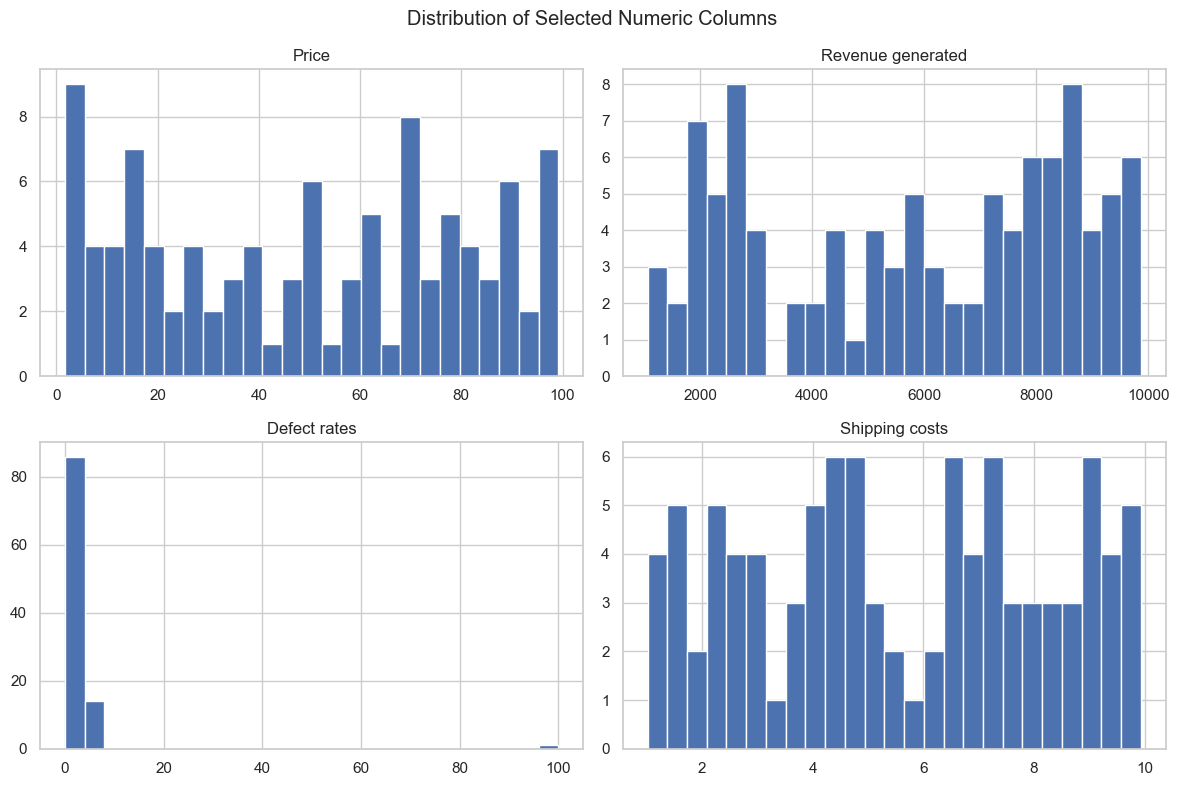

In [ ]:
# Distribution plots for selected numerical columns
# It shows how often certain values appear for a specific area
selected_num = ['Price', 'Revenue generated', 'Defect rates', 'Shipping costs']
df[selected_num].hist(bins=25, figsize=(12, 8))
plt.suptitle("Distribution of Selected Numeric Columns")
plt.tight_layout()
plt.show()

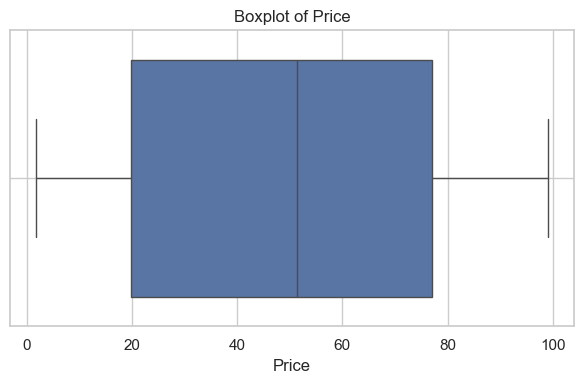

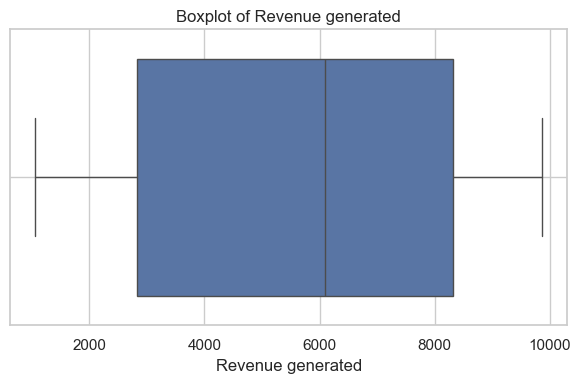

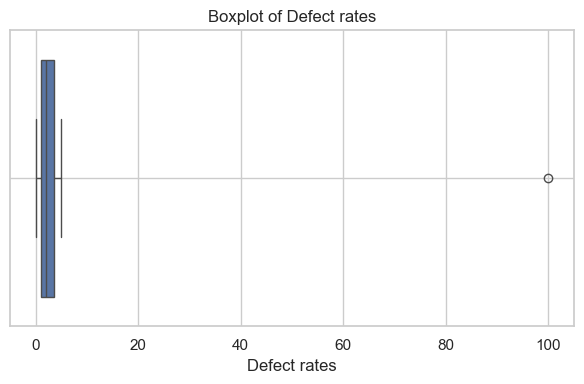

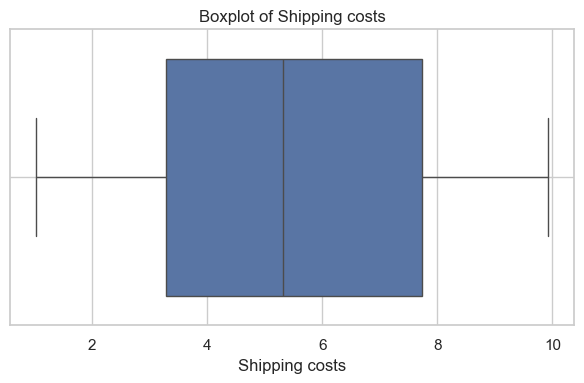

In [ ]:
# Boxplots for detecting outliers
selected_num = ['Price', 'Revenue generated', 'Defect rates', 'Shipping costs']

for col in selected_num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Findings:
# - One obvious Outlier in Defect rates -> Check further

In [ ]:
# Check for negative values where not expected
print("\nNegative values in Shipping times:")
print(df[df['Shipping times'] < 0][['SKU', 'Shipping times']])


Negative values in 'Shipping times':
    SKU  Shipping times
2  SKU2              -5


In [ ]:
# Value counts for selected categorical features
print("\nTop values in 'Transportation modes':")
print(df['Transportation modes'].value_counts(dropna=False))


Top values in 'Transportation modes':
Transportation modes
Road    30
Rail    27
Air     26
Sea     17
road     1
Name: count, dtype: int64


In [81]:
print("\nTop values in 'Shipping carriers':")
print(df['Shipping carriers'].value_counts(dropna=False))


Top values in 'Shipping carriers':
Shipping carriers
Carrier B    44
Carrier C    29
Carrier A    27
DHL           1
Name: count, dtype: int64


In [82]:
print("\nTop values in 'Customer demographics':")
print(df['Customer demographics'].value_counts(dropna=False))


Top values in 'Customer demographics':
Customer demographics
Unknown       29
Female        24
Non-binary    21
Male          21
NaN            6
Name: count, dtype: int64


### Observations for further Data Cleaning
- Price Coloumns should only have 2 decimals
- Defect rates should be in percentage
- Missing Values in "Shipping costs" and "Customer demographics"
- Line 8 and 15 are almost the same?
- Shipping times include negative values
- Defect rates and Shipping costs show a strong outlier at 100%
- Some columns show overlapping meaning (`Lead time` vs `Lead times`)
- One Duplicated row detected
- One obvious Outlier in Defect rates -> Check further

- Lowercased and inconsistent category labels in transport-related columns
- 'Availability' is stored as string – possible type issue